In [73]:

from Finite_Spaces.Presentations import *
from Finite_Spaces.Morse         import *

---

<img src="Figures/Figure1.png" width="300">

In [167]:
X = SimplicialComplex([['x_0', 'x_1'], ['x_0', 'x_2'], ['x_1', 'x_2'], ['x_1', 'x_3'], ['x_2', 'x_3']])
#X = SimplicialComplex([['x_0', 'x_1', 'x_5'], ['x_0', 'x_2'], ['x_1', 'x_2'], ['x_1', 'x_3'], ['x_2', 'x_3']])
X

Simplicial complex with vertex set ('x_0', 'x_1', 'x_2', 'x_3') and 5 facets

In [75]:
X.homology()

{0: 0, 1: Z x Z}

<img src="Figures/Figure2.png" width="300">

In [106]:
Y = SimplicialComplex([['x_0', 'x_1', 'x_2'], ['x_1', 'x_3'], ['x_2', 'x_3']])
Y

Simplicial complex with vertex set ('x_0', 'x_1', 'x_2', 'x_3') and 3 facets

In [77]:
Y.homology()

{0: 0, 1: Z, 2: 0}

In [78]:
Y.faces()

{-1: {()},
 0: {('x_0',), ('x_1',), ('x_2',), ('x_3',)},
 1: {('x_0', 'x_1'),
  ('x_0', 'x_2'),
  ('x_2', 'x_1'),
  ('x_1', 'x_3'),
  ('x_2', 'x_3')},
 2: {('x_0', 'x_2', 'x_1')}}

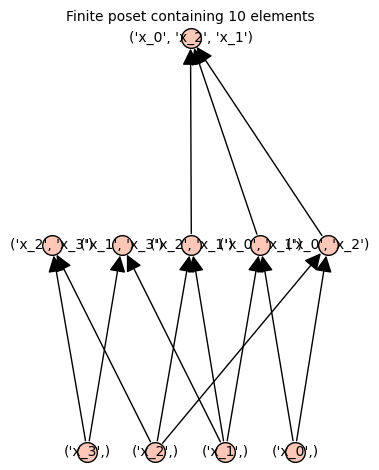

In [79]:
Y.face_poset()

---

In [80]:
RP = simplicial_complexes.RealProjectiveSpace(2)
RP

Minimal triangulation of the real projective plane

In [81]:
RP.homology()

{0: 0, 1: C2, 2: 0}

In [82]:
RP.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (3, 5),
  (4, 5)},
 2: {(0, 1, 2),
  (0, 1, 5),
  (0, 2, 3),
  (0, 3, 4),
  (0, 4, 5),
  (1, 2, 4),
  (1, 3, 4),
  (1, 3, 5),
  (2, 3, 5),
  (2, 4, 5)}}

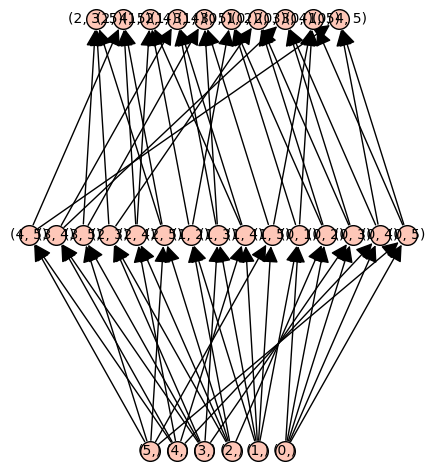

In [83]:
RP_poset = RP.face_poset()
RP_poset.show()

---

In [255]:
def get_morse_presentation(sc):
    sc = copy(sc)
    
    try:
        sc.faces()[2]
        print('Nice original complex!')
    except:
        face = list(sc.faces()[1])[0]
        new_face = face.join(Simplex(['x']), rename_vertices=False)
        sc.add_face(new_face)
        print('Updated complex!')
        sc

    poset = sc.face_poset()
    matching = spanning_matching(poset)
        
    two_simplices = sc.faces()[2]
    att_2 = {}
    for simplex in two_simplices:
        att_2[tuple(simplex)] = [((simplex[0], simplex[1]), 1), ((simplex[1], simplex[2]), 1), ((simplex[0], simplex[2]), -1)]

    critical_cells = critical_by_level(poset, matching)
    attaching = attaching_Morse(att_2, matching, critical_cells[2])
    return att_to_group(attaching, critical_cells[1])

In [259]:
get_morse_presentation(RP)

Nice original complex!


Finitely presented group < a0, a1 | a1*a0^-1, a1*a0 >